In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import random
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords



In [105]:
data = pd.read_csv('/home/hasan/DATA SET/Fake News/train.csv')

In [106]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [107]:
data.shape

(20800, 5)

# Feature Engineering

In [108]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [109]:
#total number and percent of null value 
print('null value number = {} and percent = {} '.format((data['title'].isnull().sum()),   (data['title'].isnull().sum() *100)/len(data['title'])))
print('null value number = {} and percent = {} '.format((data['author'].isnull().sum()),   (data['author'].isnull().sum() *100)/len(data['title'])))
print('null value number = {} and percent = {} '.format((data['text'].isnull().sum()),   (data['text'].isnull().sum() *100)/len(data['title'])))

null value number = 558 and percent = 2.6826923076923075 
null value number = 1957 and percent = 9.408653846153847 
null value number = 39 and percent = 0.1875 


In [110]:
#dropping null value
data.dropna(axis=0, inplace=True)
print('Shape after dropping null value :', data.shape)

Shape after dropping null value : (18285, 5)


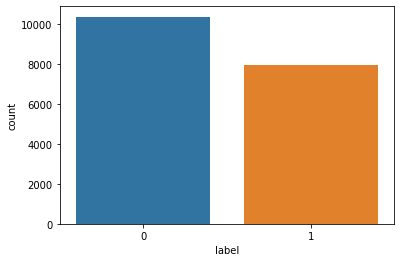

In [111]:
#checking balanced or imbalanced data
sns.countplot(data['label'])

It is clear that this dataset is balanced

In [112]:
#index resetting
data = data.reset_index()
data.drop(['index','id'], axis=1, inplace=True)
data.columns.rename={'level_0':'id'}
data.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [113]:
#printing a text
data['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [114]:
ps = PorterStemmer()

In [120]:
corpus = []

for row in range(0,len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][row])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [122]:
#printing a paragraph
corpus[2]

'truth might get fire octob tension intellig analyst polit policymak alway honest assess desir result latter often overwhelm former iraq war write lawrenc davidson lawrenc davidson might wonder foreign polici maker repeatedli make bad choic insight might drawn follow analysi action play unit state lesson probabl univers back earli spring georg w bush initi invas iraq one key public reason claim countri dictat saddam hussein verg develop nuclear weapon hide weapon mass destruct real reason went beyond charg includ long rang plan regim chang middl east presid georg w bush vice presid dick cheney receiv oval offic brief cia director georg tenet also present chief staff andi card right white hous photo purpos concentr belief iraq becom hostil nuclear power presid bush close associ accept scenario readili short answer bush want inde need believ rational invad iraq first tri connect saddam hussein attack u though never gave stratagem lack evid made difficult ralli american peopl alreadi fixa

In [126]:
#Bag of Words using TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf.fit_transform(corpus).toarray()
print('Shape of X is :',X.shape)

Shape of X is : (18285, 5000)


In [127]:
#printing some feature names
tfidf.get_feature_names()[:10]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc']

In [128]:
#printing parameter
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [129]:
#label data
y = data['label']
print('Length of y :',len(y))

Length of y : 18285


In [131]:
#dividing dataset for train and test
Xtrain,xtest,Ytrain,ytest = train_test_split(X,y, test_size=.2, random_state=0)
print('Shape of Xtrain :',Xtrain.shape)
print('Shape of xtest :',xtest.shape)
print('Shap of Ytrain :',Ytrain.shape)
print('Shape of ytest :',ytest.shape)

Shape of Xtrain : (14628, 5000)
Shape of xtest : (3657, 5000)
Shap of Ytrain : (14628,)
Shape of ytest : (3657,)


In [133]:
#printing some BOW words data
df = pd.DataFrame(Xtrain, columns=tfidf.get_feature_names())
df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.016152,0.0,0.0,0.0,...,0.017074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04646,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


# MultinomialNB Algorithm

In [136]:
mnb = MultinomialNB()
mnb.fit(Xtrain,Ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [137]:
mnb.score(xtest,ytest)

0.8990976210008204

# MultinomialNB with Hyperparameter

In [141]:
for alpha  in np.arange(0,1, .1):
    mnb_hyparamet = MultinomialNB(alpha=alpha)
    mnb_hyparamet.fit(Xtrain,Ytrain)
    scores = mnb_hyparamet.score(xtest,ytest)
    print('for alpha ={} accuracy is {}'.format(alpha, scores))
    
    

/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


for alpha =0.0 accuracy is 0.9012852064533771
for alpha =0.1 accuracy is 0.9010117582718075
for alpha =0.2 accuracy is 0.9012852064533771
for alpha =0.30000000000000004 accuracy is 0.9010117582718075
for alpha =0.4 accuracy is 0.9015586546349467
for alpha =0.5 accuracy is 0.9012852064533771
for alpha =0.6000000000000001 accuracy is 0.9001914137270988
for alpha =0.7000000000000001 accuracy is 0.8999179655455292
for alpha =0.8 accuracy is 0.8999179655455292
for alpha =0.9 accuracy is 0.89937106918239


So, I can say alpha=.2 is best

In [169]:
#with alpha=.2
mnb = MultinomialNB(alpha=.2)
mnb.fit(Xtrain,Ytrain)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [170]:
#printing score of the model
mnb.score(xtest,ytest)

0.9012852064533771

In [171]:
#predicting with test data
predicted = mnb.predict(xtest)
predicted

array([0, 0, 1, ..., 0, 0, 1])

In [172]:
#classification report
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2040
           1       0.94      0.83      0.88      1617

    accuracy                           0.90      3657
   macro avg       0.91      0.89      0.90      3657
weighted avg       0.90      0.90      0.90      3657



In [174]:
#confusion matrix
confusion_matrix(ytest,predicted)

array([[1949,   91],
       [ 270, 1347]])

# Passive Aggressive Classifier Algorithm

In [162]:
pac = PassiveAggressiveClassifier()
pac.fit(Xtrain,Ytrain)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [163]:
#printing accuracy of the model
pac.score(xtest,ytest)

0.9455838118676511

This algorithm's accuracy is better than MultinomialNB

In [164]:
#predicting with test data
predicted = pac.predict(xtest)
predicted

array([0, 0, 1, ..., 0, 0, 1])

Confusion matrix, without normalization
[[1934  106]
 [  93 1524]]


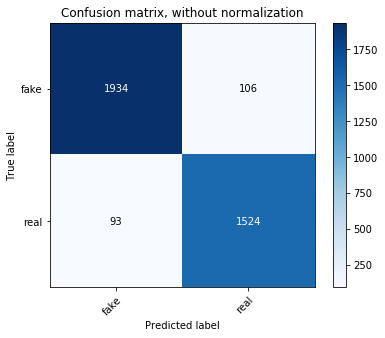

In [167]:
#confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5) # ADD THIS LINE
    plt.ylim(len(np.unique(y))-0.5, -0.5) # ADD THIS LINE
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(ytest, predicted, classes=['fake','real'],
                      title='Confusion matrix, without normalization')
